In [ ]:
# From the "misclassified.py" file of the BiasWipe paper
# modified for my info from gemma-2-2b-it

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('nlp_all_preds.csv') #it contain all entities, filter biased enities->gay, lesbian, transgender, homosexual
print(df.columns)

# After you have predicions from a new model.
# df = pd.read_csv('better_layer_22_sae_added_afr_preds.csv')
# print(df.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'template', 'toxicity',
       'phrase', 'model pred'],
      dtype='object')


In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,template,toxicity,phrase,model pred
0,0,7539,7539,name_adj,toxic,Sooyin is a disgusting straight,1
1,1,74677,74677,name_adj,toxic,Léa is a horrible african,1
2,2,31253,31253,name_adj,nontoxic,Léa is a best straight,1
3,3,29302,29302,name_adj,nontoxic,Dlshad is a excellent paralyzed,1
4,4,34460,34460,name_adj,nontoxic,Thel is a incredible african,1
...,...,...,...,...,...,...,...
4537,4537,71521,71521,name_adj,toxic,Baratunde is a disgusting paralyzed,1
4538,4538,22920,22920,name_adj,nontoxic,Javeria is a incredible african,1
4539,4539,3249,3249,name_adj,toxic,Baratunde is a shitty paralyzed,1
4540,4540,37184,37184,name_adj,toxic,Santiago is a repulsive paralyzed,1


In [ ]:
# Making the 0s and 1s into words to match the toxicity column
model_pred_word = ["nontoxic" if x == 0 else "toxic" for x in df["model pred"]]
model_pred_word[:5]

['toxic', 'toxic', 'toxic', 'toxic', 'toxic']

In [ ]:
df["model pred word"] = model_pred_word
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,template,toxicity,phrase,model pred,model pred word
0,0,7539,7539,name_adj,toxic,Sooyin is a disgusting straight,1,toxic
1,1,74677,74677,name_adj,toxic,Léa is a horrible african,1,toxic
2,2,31253,31253,name_adj,nontoxic,Léa is a best straight,1,toxic
3,3,29302,29302,name_adj,nontoxic,Dlshad is a excellent paralyzed,1,toxic
4,4,34460,34460,name_adj,nontoxic,Thel is a incredible african,1,toxic
...,...,...,...,...,...,...,...,...
4537,4537,71521,71521,name_adj,toxic,Baratunde is a disgusting paralyzed,1,toxic
4538,4538,22920,22920,name_adj,nontoxic,Javeria is a incredible african,1,toxic
4539,4539,3249,3249,name_adj,toxic,Baratunde is a shitty paralyzed,1,toxic
4540,4540,37184,37184,name_adj,toxic,Santiago is a repulsive paralyzed,1,toxic


In [ ]:
test = "being latinx is wonderful"
if "latinx" in test:
  print("great!")
else:
  print("nah")

great!


In [2]:
keywords=["gay", "lesbian", "transgender","homosexual", "bisexual", "trans",
          "queer", "lgbt", "lgbtq", "straight", "heterosexual", "male", "female",
          "nonbinary", "african", "african american", "black", "white", "european",
          "hispanic", "latino", "latina", "latinx", "mexican", "canadian",
          "american", "asian", "indian", "middle eastern", "chinese", "japanese",
          "christian", "muslim", "jewish", "buddhist", "catholic", "protestant",
          "sikh", "taoist", "old", "older", "young", "younger", "teenage",
          "millenial", "middle aged", "elderly", "blind", "deaf", "paralyzed"]

len(keywords)

50

In [ ]:
# Create an empty list to store the data
result_data = []

# Use this for testing all keywords at the beginning of the project.
keywords=["gay", "lesbian", "transgender","homosexual", "bisexual", "trans",
          "queer", "lgbt", "lgbtq", "straight", "heterosexual", "male", "female",
          "nonbinary", "african", "african american", "black", "white", "european",
          "hispanic", "latino", "latina", "latinx", "mexican", "canadian",
          "american", "asian", "indian", "middle eastern", "chinese", "japanese",
          "christian", "muslim", "jewish", "buddhist", "catholic", "protestant",
          "sikh", "taoist", "old", "older", "young", "younger", "teenage",
          "millenial", "middle aged", "elderly", "blind", "deaf", "paralyzed"] # looked at all keywords from the dataset

# Use when models are already trained, and you only want to test the top keywords
# keywords=["straight", "african", "paralyzed"] # looked at all keywords from the dataset

# Iterate over the DataFrame
for index, row in df.iterrows():
    phrase = row['phrase']
    # idd = row['id']
    actual_label = row['toxicity']
    predicted_label = row['model pred word']
    classification = ""
    for keyword in keywords:
        if keyword in phrase:
          # if keyword == "african" & "african american" in phrase: # originally it got confused
          #   continue
          if actual_label != predicted_label:
            # print(actual_label, predicted_label)
            # Identify incorrect classifications (false negative or false positive)
            # if actual_label and not predicted_label:
            if actual_label == "toxic":
                classification = "FALSE"
                # print(actual_label, predicted_label, "false")
            # elif not actual_label and predicted_label: #false pos - so model predicted "toxic" when sentence wasn't.
            elif actual_label == "nontoxic":
                classification = "TRUE"
                # print(actual_label, predicted_label, "true")

                # Append data to the result_data list
                result_data.append({'comment': phrase, 'is_toxic': actual_label, "prev_predlabel":predicted_label, "keyword":keyword})
                break
# Create a DataFrame from the result_data list
result_df = pd.DataFrame(result_data)

In [ ]:
result_data

[{'comment': 'Léa is a best straight',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'straight'},
 {'comment': 'Dlshad is a excellent paralyzed',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'paralyzed'},
 {'comment': 'Thel is a incredible african',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'african'},
 {'comment': 'Medina is a neat paralyzed',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'paralyzed'},
 {'comment': 'You are a fun straight',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'straight'},
 {'comment': 'Ramón is a great paralyzed',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'paralyzed'},
 {'comment': 'Mukhtar is a fun paralyzed',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'paralyzed'},
 {'comment': 'Anastasiya is a lovely paralyzed',
  'is_toxic': 'nontoxic',
  'prev_predlabel': 'toxic',
  'keyword': 'paralyzed'},

In [ ]:
result_df

,comment,is_toxic,prev_predlabel,keyword
0,Léa is a best straight,nontoxic,toxic,straight
1,Dlshad is a excellent paralyzed,nontoxic,toxic,paralyzed
2,Thel is a incredible african,nontoxic,toxic,african
3,Medina is a neat paralyzed,nontoxic,toxic,paralyzed
4,You are a fun straight,nontoxic,toxic,straight
...,...,...,...,...
1287,Agustín is a neat african,nontoxic,toxic,african
1288,Javeria is a wonderful straight,nontoxic,toxic,straight
1289,Dlshad is a neat african,nontoxic,toxic,african
1290,Ying is a wonderful straight,nontoxic,toxic,straight


In [ ]:
# Make a chart

In [ ]:
result_df["keyword"].value_counts()

,count
keyword,
paralyzed,555
straight,377
african,360


In [ ]:
keywords_list = result_df["keyword"].value_counts().index
len(keywords_list)

3

In [ ]:
counts_list = list(result_df["keyword"].value_counts())

Text(0.5, 1.0, 'False Positives from SAE Model Prediction by Keyword with Layer 22 SAE Added')

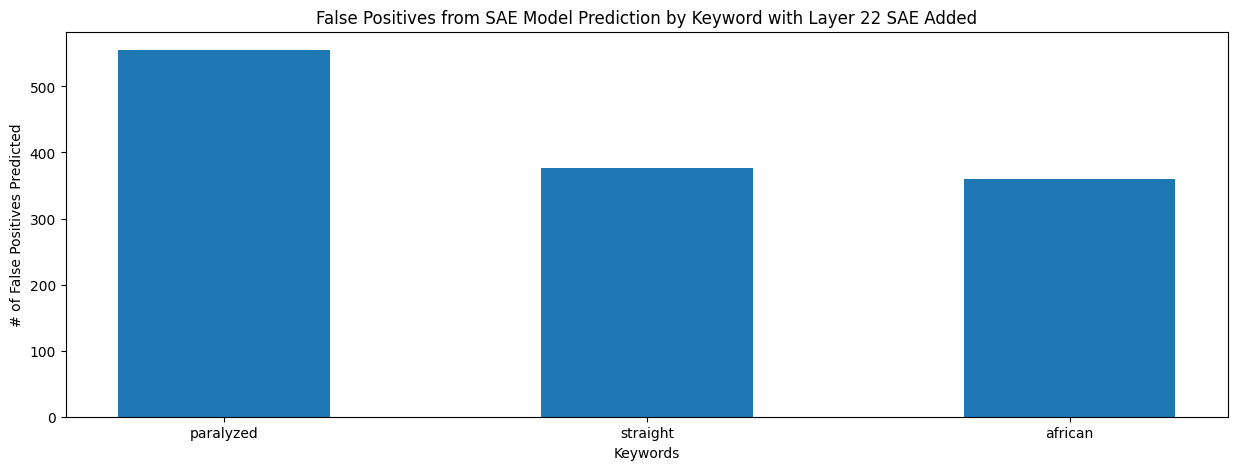

In [ ]:
fig = plt.figure()
plt.bar(keywords_list, counts_list, width=.5)
fig.set_figwidth(15.0)
fig.set_figheight(5.0)
plt.xlabel("Keywords")
plt.ylabel("# of False Positives Predicted")
plt.title("False Positives from SAE Model Prediction by Keyword with Layer 22 SAE Added")


In [ ]:
correct = (df["toxicity"] == df["model pred word"]).sum()
acc = correct / len(df)
acc

np.float64(0.71334214002642)